In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [130]:
# Basic Settings

In [131]:
s = 1
K = 1.25
sigma = 0.2
np.random.seed(0)

# Q2,Q3: draw the value function when $\rho=0$,$\rho=-1$

In [132]:
def upsilon_rho0(p):
    return (1 - p) * (1 - stats.norm.cdf(5 * np.log(1.25) + 0.1))


def upsilon_rho_neg1(p):
    return p - stats.norm.cdf(5 * np.log(1.25) + 0.1)

Text(0, 0.5, '$\\upsilon(0,p)$')

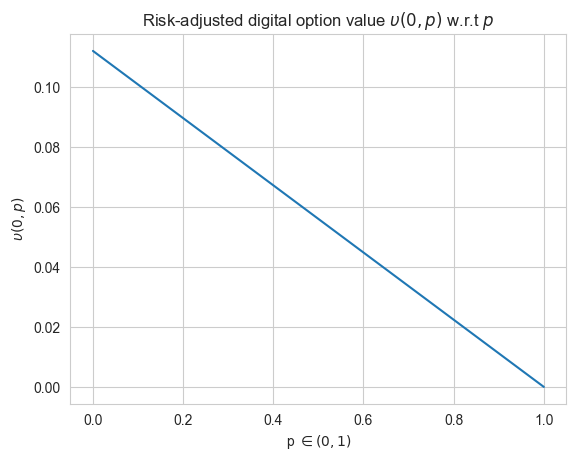

In [133]:
# draw upsilon_rho0 for p in 0 to 1
p = np.linspace(0, 1, 100)
# plt.figure(figsize=(10,5))
plt.title(r"Risk-adjusted digital option value $\upsilon(0,p)$ w.r.t $p$")
plt.plot(p, upsilon_rho0(p))
plt.xlabel(r"p $\in (0,1)$")
plt.ylabel(r"$\upsilon(0,p)$")

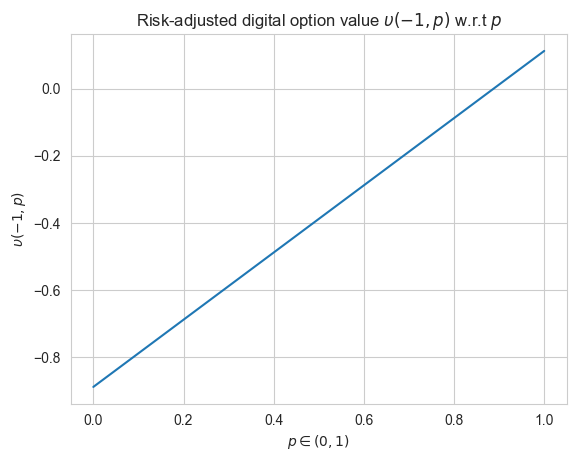

In [134]:
# draw upsilon_rho0 for p in 0 to 1
p = np.linspace(0, 1, 100)
# plt.figure(figsize=(10,5))
plt.title(r"Risk-adjusted digital option value $\upsilon(-1,p)$ w.r.t $p$")
plt.plot(p, upsilon_rho_neg1(p))
plt.xlabel(r"$p \in (0,1)$")
plt.ylabel(r"$\upsilon(-1,p)$")
plt.show()

# Q4: Monte Carlo Simulation when p=0.05

In [135]:
def MC1_upsilon_p005(rho):
    Z = stats.norm.rvs(size=N)
    W = stats.norm.rvs(size=N)
    a = stats.norm.ppf(0.05)
    S = s * np.exp(0.2 * Z - 0.5 * 0.2 ** 2)
    Y = rho * Z + np.sqrt(1 - rho ** 2) * W
    upsilon = np.where((S >= K) & (Y > a), 1, 0)
    return np.mean(upsilon)

In [136]:
N = 10_000


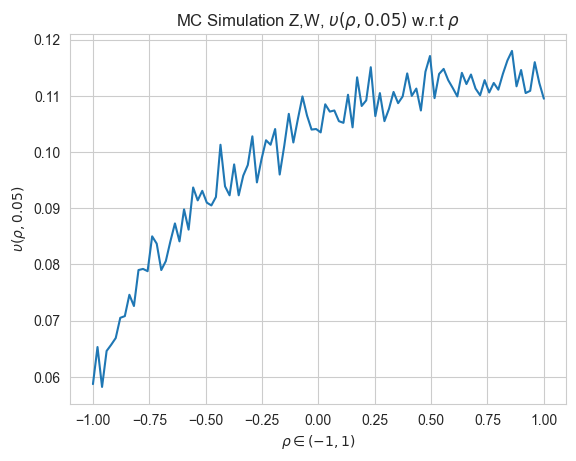

In [137]:
plt.plot(np.linspace(-1, 1, 100), [MC1_upsilon_p005(rho) for rho in np.linspace(-1, 1, 100)])
plt.xlabel(r"$\rho \in (-1,1)$")
plt.ylabel(r"$\upsilon(\rho,0.05)$")
plt.title(r"MC Simulation Z,W, $\upsilon(\rho,0.05)$ w.r.t $\rho$")
plt.show()

# Q5: Monte Carlo Simulation when p=0.5, correlation risk 

In [138]:
epsilon = 0.01


def MC1_corr_risk(rho, epsilon):
    return 1 / epsilon * (MC1_upsilon_p005(rho + epsilon) - MC1_upsilon_p005(rho))

C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\815927159.py:6: RuntimeWarning: invalid value encountered in sqrt
  Y = rho * Z + np.sqrt(1 - rho ** 2) * W


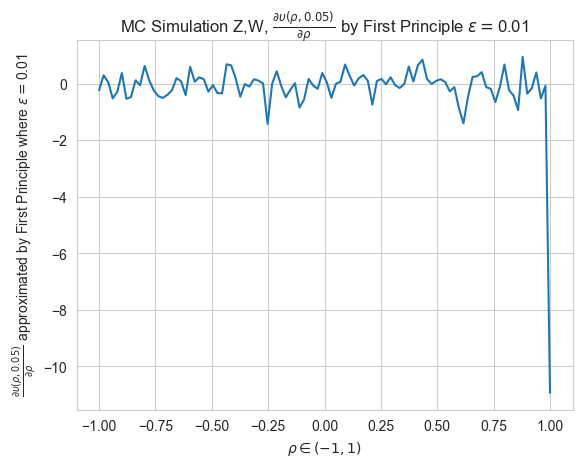

In [139]:
plt.plot(np.linspace(-1, 1, 100), [MC1_corr_risk(rho, epsilon) for rho in np.linspace(-1, 1, 100)])
plt.xlabel(r"$\rho \in (-1,1)$")
plt.ylabel(
    r"$\frac{\partial\upsilon(\rho,0.05)}{\partial \rho}$ approximated by First Principle where $\varepsilon=$" + f'{epsilon}')
plt.title(
    r"MC Simulation Z,W, $\frac{\partial\upsilon(\rho,0.05)}{\partial \rho}$ by First Principle $\varepsilon=$" + f'{epsilon}')
plt.show()

# Q8: Monte Carlo Simulation when p=0.05, simulate one random variable only

In [140]:
def MC2_upsilon_p005(rho):
    a = stats.norm.ppf(0.05)
    Z = stats.norm.rvs(size=N)
    indicator = np.where(s * np.exp(0.2 * Z - 0.5 * 0.2 ** 2) > K, 1, 0)
    return np.mean(indicator * stats.norm.cdf((rho * Z - a) / np.sqrt(1 - rho ** 2)))

C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\996560209.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.mean(indicator * stats.norm.cdf((rho * Z - a) / np.sqrt(1 - rho ** 2)))


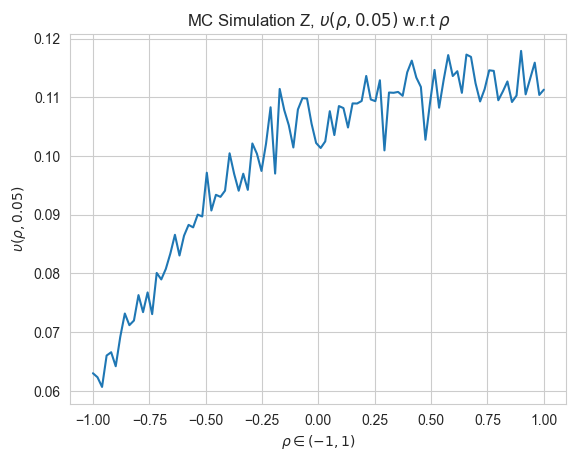

In [141]:
plt.plot(np.linspace(-1, 1, 100), [MC2_upsilon_p005(rho) for rho in np.linspace(-1, 1, 100)])
plt.xlabel(r"$\rho \in (-1,1)$")
plt.ylabel(r"$\upsilon(\rho,0.05)$")
plt.title(r"MC Simulation Z, $\upsilon(\rho,0.05)$ w.r.t $\rho$")
plt.show()

# Q9: Monte Carlo Simulation when p=0.05, simulate one random variable only, expected value of the partial differentiation

In [142]:
def MC2_corr_risk(rho):
    a = stats.norm.ppf(0.05)
    Z = stats.norm.rvs(size=N)
    indicator = np.where(s * np.exp(0.2 * Z - 0.5 * 0.2 ** 2) > K, 1, 0)
    return indicator * stats.norm.pdf((rho * Z - a) / np.sqrt(1 - rho ** 2)) * (Z - a * rho) / (1 - rho ** 2) ** 1.5

C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\247514618.py:5: RuntimeWarning: divide by zero encountered in divide
  return indicator * stats.norm.pdf((rho * Z - a) / np.sqrt(1 - rho ** 2)) * (Z - a * rho) / (1 - rho ** 2) ** 1.5
C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\247514618.py:5: RuntimeWarning: invalid value encountered in divide
  return indicator * stats.norm.pdf((rho * Z - a) / np.sqrt(1 - rho ** 2)) * (Z - a * rho) / (1 - rho ** 2) ** 1.5


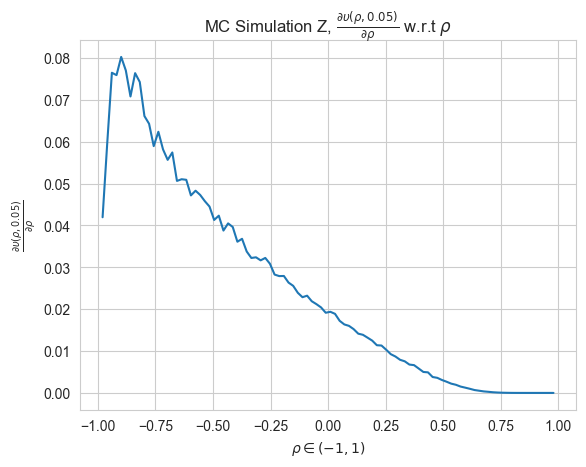

In [143]:
plt.plot(np.linspace(-1, 1, 100), [np.mean(MC2_corr_risk(rho)) for rho in np.linspace(-1, 1, 100)])
plt.xlabel(r"$\rho \in (-1,1)$")
plt.ylabel(r"$\frac{\partial\upsilon(\rho,0.05)}{\partial \rho}$")
plt.title(r"MC Simulation Z, $\frac{\partial\upsilon(\rho,0.05)}{\partial \rho}$ w.r.t $\rho$")
plt.show()

# Q10: Numerical Integration

In [144]:
M = 200
b = 5


def numerical_upsilon(rho):
    a = stats.norm.ppf(0.05)
    x = np.array([-b + 2 * b * i / M for i in range(1, M)])
    w = np.array([stats.norm.cdf(x[0])] + [stats.norm.cdf(x[i]) - stats.norm.cdf(x[i - 1]) for i in range(1, len(x))])
    indicator = np.where(s * np.exp(0.2 * x - 0.5 * 0.2 ** 2) > K, 1, 0)
    return np.average(indicator * stats.norm.cdf((rho * x - a) / np.sqrt(1 - rho ** 2)), weights=w)

C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\3691753319.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.average(indicator * stats.norm.cdf((rho * x - a) / np.sqrt(1 - rho ** 2)), weights=w)


Text(0.5, 1.0, 'Numerical Integration, $\\upsilon(\\rho,0.05)$ w.r.t $\\rho$')

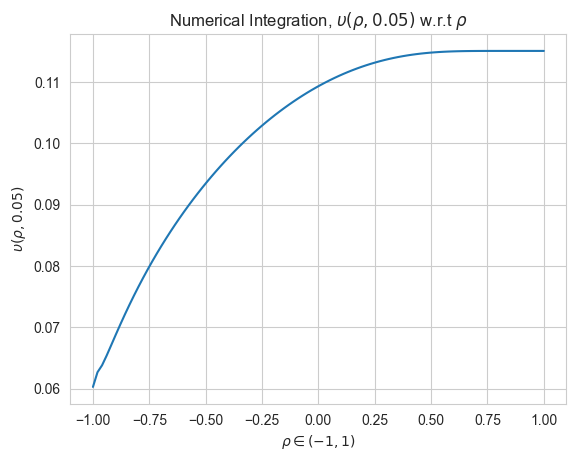

In [145]:
plt.plot(np.linspace(-1, 1, 100), [numerical_upsilon(rho) for rho in np.linspace(-1, 1, 100)])
plt.xlabel(r"$\rho \in (-1,1)$")
plt.ylabel(r"$\upsilon(\rho,0.05)$")
plt.title(r"Numerical Integration, $\upsilon(\rho,0.05)$ w.r.t $\rho$")

# Q11: numerical integration for partial differentiation

In [146]:
def numerical_upsilon_partial(rho):
    a = stats.norm.ppf(0.05)
    x = np.array([-b + 2 * b * i / M for i in range(1, M)])
    w = np.array([stats.norm.cdf(x[0])] + [stats.norm.cdf(x[i]) - stats.norm.cdf(x[i - 1]) for i in range(1, len(x))])
    indicator = np.where(s * np.exp(0.2 * x - 0.5 * 0.2 ** 2) > K, 1, 0)
    return np.average(indicator * stats.norm.pdf((rho * x - a) / np.sqrt(1 - rho ** 2)) * (x - a * rho) / (1 - rho ** 2) ** 1.5, weights=w)

C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\1583727465.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.average(indicator * stats.norm.pdf((rho * x - a) / np.sqrt(1 - rho ** 2)) * (x - a * rho) / (1 - rho ** 2) ** 1.5, weights=w)
C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\1583727465.py:6: RuntimeWarning: invalid value encountered in divide
  return np.average(indicator * stats.norm.pdf((rho * x - a) / np.sqrt(1 - rho ** 2)) * (x - a * rho) / (1 - rho ** 2) ** 1.5, weights=w)


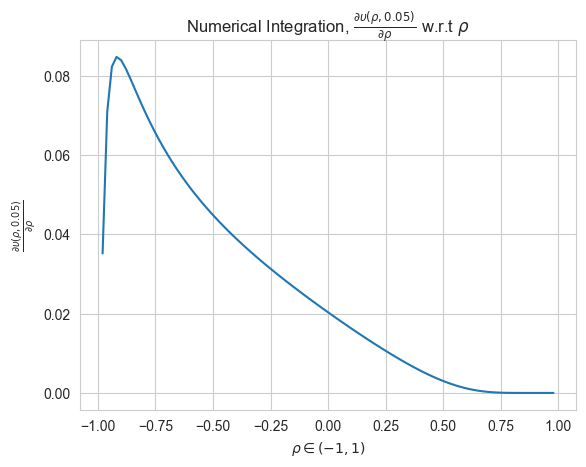

In [147]:
plt.plot(np.linspace(-1, 1, 100), [numerical_upsilon_partial(rho) for rho in np.linspace(-1, 1, 100)])
plt.xlabel(r"$\rho \in (-1,1)$")
plt.ylabel(r"$\frac{\partial\upsilon(\rho,0.05)}{\partial \rho}$")
plt.title(r"Numerical Integration, $\frac{\partial\upsilon(\rho,0.05)}{\partial \rho}$ w.r.t $\rho$")
plt.show()